In [27]:
import numpy as np
import os
from scipy.io.wavfile import read as wavread
import IPython
import matplotlib.pyplot as plt
import python_speech_features as sf
plt.rcParams['figure.dpi'] = 150
# plt.rcParams['figure.figsize'] = 1,1
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from tqdm import tqdm
import seaborn as sns

In [2]:
%matplotlib inline

In [18]:
speakers = ['awb','bdl','clb','jmk','ksp','rms','slt']
root = os.getcwd()
spk0 = speakers[0]
spk1 = speakers[3]
folderpath0 = os.path.join(root,'datasets',spk0,'wav'); files0 = sorted(os.listdir(folderpath0))
folderpath1 = os.path.join(root,'datasets',spk1,'wav'); files1 = sorted(os.listdir(folderpath1))

In [20]:
for file0,file1 in zip(files0,files1):
    file0 = os.path.join(folderpath0,file0)  # Select the file from Speaker 0
    file1 = os.path.join(folderpath1,file1)  # Select the file from Speaker 1
    
    fs0,audio0 = wavread(file0)              # Read the file from Speaker 0
    fs1,audio1 = wavread(file1)              # Read the file from Speaker 1
    
    assert fs0 == fs1                        # Assert that the sampling frequency is the same
    
    if len(audio0) != len(audio1):
        print(len(audio0),len(audio1))
        
    break
# IPython.display.Audio(file0)
IPython.display.Audio(file1)

64000 62801


In [22]:
speaker_rec_length = []
for spkr in speakers:
    folderpath = os.path.join(root,'datasets',spkr,'wav')
    files = sorted(os.listdir(folderpath))
    recordings_length = []
    for file in files:
        filepath = os.path.join(folderpath,file)
        fs, audio = wavread(filepath)
        recordings_length.append(len(audio))
    speaker_rec_length.append(recordings_length)

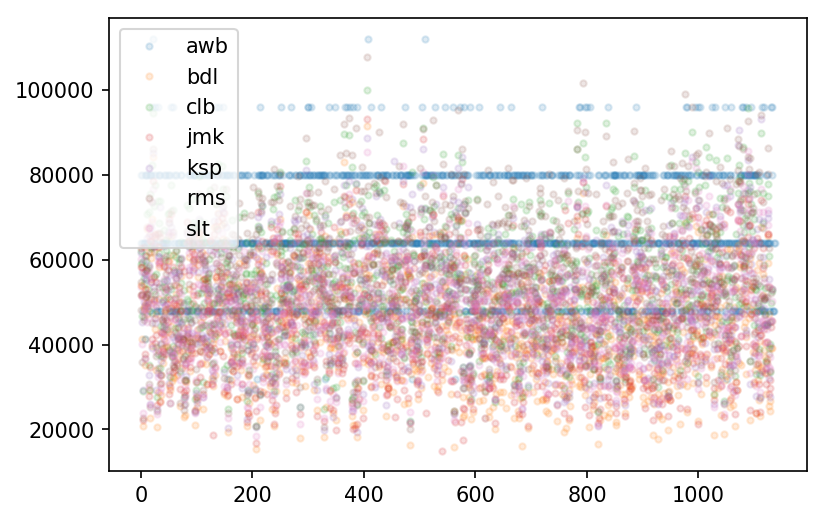

In [35]:
for spkr,speaker_recs in zip(speakers,speaker_rec_length):
    plt.plot(speaker_recs,'o',label=spkr,alpha=0.15,markersize=3)
    
plt.legend()



In [37]:
N = len(audio0)
T = N/fs
win_t = 5E-3
win_n = int(win_t/T*N)
stride = 16000
num_rounds = int((N-win_n)/stride)
m = 0
for k in range(num_rounds):
    ind_i = k * stride
    ind_f = (k+1)*stride+win_n
    seg = audio[ind_i:ind_f]
    mfcc = sf.mfcc(seg)
    distance, path = fastdtw(mfcc,mfcc, dist=euclidean)
#     plt.plot(np.arange(ind_i,ind_f),audio[ind_i:ind_f])
    break

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38),
 (39, 39),
 (40, 40),
 (41, 41),
 (42, 42),
 (43, 43),
 (44, 44),
 (45, 45),
 (46, 46),
 (47, 47),
 (48, 48),
 (49, 49),
 (50, 50),
 (51, 51),
 (52, 52),
 (53, 53),
 (54, 54),
 (55, 55),
 (56, 56),
 (57, 57),
 (58, 58),
 (59, 59),
 (60, 60),
 (61, 61),
 (62, 62),
 (63, 63),
 (64, 64),
 (65, 65),
 (66, 66),
 (67, 67),
 (68, 68),
 (69, 69),
 (70, 70),
 (71, 71),
 (72, 72),
 (73, 73),
 (74, 74),
 (75, 75),
 (76, 76),
 (77, 77),
 (78, 78),
 (79, 79),
 (80, 80),
 (81, 81),
 (82, 82),
 (83, 83),
 (84, 84),
 (85, 85),
 (86, 86),
 (87, 87),
 (88, 88),
 (89, 89),
 (90, 90),
 (91, 91),
 (92, 92

In [36]:
euclidean

<function scipy.spatial.distance.euclidean(u, v, w=None)>

['arctic_a0001.wav',
 'arctic_a0002.wav',
 'arctic_a0003.wav',
 'arctic_a0004.wav',
 'arctic_a0005.wav',
 'arctic_a0006.wav',
 'arctic_a0007.wav',
 'arctic_a0008.wav',
 'arctic_a0009.wav',
 'arctic_a0010.wav',
 'arctic_a0011.wav',
 'arctic_a0012.wav',
 'arctic_a0013.wav',
 'arctic_a0014.wav',
 'arctic_a0015.wav',
 'arctic_a0016.wav',
 'arctic_a0017.wav',
 'arctic_a0018.wav',
 'arctic_a0019.wav',
 'arctic_a0020.wav',
 'arctic_a0021.wav',
 'arctic_a0022.wav',
 'arctic_a0023.wav',
 'arctic_a0024.wav',
 'arctic_a0025.wav',
 'arctic_a0026.wav',
 'arctic_a0027.wav',
 'arctic_a0028.wav',
 'arctic_a0029.wav',
 'arctic_a0030.wav',
 'arctic_a0031.wav',
 'arctic_a0032.wav',
 'arctic_a0033.wav',
 'arctic_a0034.wav',
 'arctic_a0035.wav',
 'arctic_a0036.wav',
 'arctic_a0037.wav',
 'arctic_a0038.wav',
 'arctic_a0039.wav',
 'arctic_a0040.wav',
 'arctic_a0041.wav',
 'arctic_a0042.wav',
 'arctic_a0043.wav',
 'arctic_a0044.wav',
 'arctic_a0045.wav',
 'arctic_a0046.wav',
 'arctic_a0047.wav',
 'arctic_a004